# Machine Learning

The problem is to take *n*-samples of data and try to predict a property of unknown data

* You can only get out what you put in. You need good features.

# Preprocessing of Data

* You view information differently than a computer, you need to make the information easy for a computer to understand

* Computers like data that is standardized and well behaved. 

A good way is a mean of 0 and a standard deviation of 1

In [ ]:
# import scikit-learn
import sklearn
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[0:1000]
y_train = y_train[0:1000]
x_test = x_test[0:100]
y_test = y_test[0:100]


print(x_train.shape)
print(x_test.shape)

(1000, 28, 28)
(100, 28, 28)


# It is always good to view what is going into the computer.

Text(0.5, 1.0, 'Target is 1')

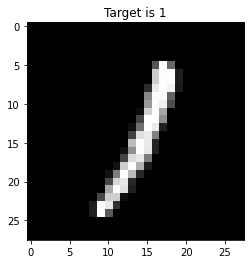

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# selects a random example
ind = np.random.randint(0,100)

plt.imshow(x_train[ind], cmap='gray')
plt.title(f'Target is {y_train[ind]}')

In [ ]:
x_train[:].reshape(-1)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train[:].reshape(x_train.shape[0],-1))

print(scaler.mean_)
print(scaler.var_)

scaled_data = scaler.transform(x_train[:].reshape(x_train.shape[0],-1)).reshape(x_train.shape)

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 2.00000e-02 1.24000e-01 0.00000e+00 9.10000e-02
 3.44000e-01 5.19000e-01 5.22000e-01 3.19000e-01 1.39000e-01 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 2.17000e-01 6.85000e-01 8.30000e-01 9.71000e-01 1.94700e+00 2.39800e+00
 4.64800e+00 5.23000e+00 4.50900e+00 3.39100e+00 1.34100e+00 8.52000e-01
 4.58000e-01 4.60000e-02 0.00000e+00 0.00000e+00 0.

Text(0.5, 1.0, 'Target is 3')

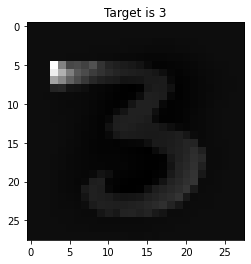

In [ ]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(scaled_data[ind], cmap='gray')
plt.title(f'Target is {y_train[ind]}')

# A simple linear machine learning model

In [ ]:
# Imports the support vector machine
from sklearn import svm

# makes an object that is the classifier with specific hyperparamters
# this is the model that you are training
clf = svm.SVC(gamma=0.001, C=100)

# Fit the model using some data
# Includes all data except the last index
clf.fit(x_train[:].reshape(x_train.shape[0],-1), y_train[:])

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'Target is 9, the prediction is 9')

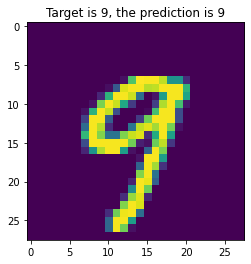

In [ ]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(x_train[ind])
plt.title(f'Target is {y_train[ind]}, the prediction is {clf.predict(x_train[:].reshape(x_train.shape[0],-1))[ind]}')

Text(0.5, 1.0, 'Target is 2, the prediction is 7')

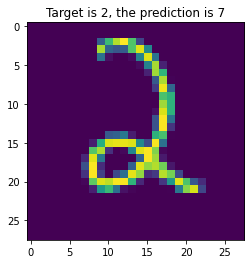

In [ ]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(x_test[ind])
plt.title(f'Target is {y_test[ind]}, the prediction is {clf.predict(x_test[:].reshape(x_test.shape[0],-1))[ind]}')

In [ ]:
clf.score(x_train[:].reshape(x_train.shape[0],-1), y_train)

1.0

In [ ]:
clf.score(x_test[:].reshape(x_test.shape[0],-1), y_test)

0.15

This is not so great

In [ ]:
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha=.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(x_train[:].reshape(x_train.shape[0],-1), y_train[:])

RidgeClassifier(alpha=0.01, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
rr.score(x_train[:].reshape(x_train.shape[0],-1), y_train)

0.997

In [ ]:
rr.score(x_test[:].reshape(x_test.shape[0],-1), y_test)

0.68

# Let's use some dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
fitter = pca.fit(x_train[:].reshape(x_train.shape[0],-1))

x_train_pca = fitter.transform(x_train[:].reshape(x_train.shape[0],-1))
x_test_pca = fitter.transform(x_test[:].reshape(x_test.shape[0],-1))

In [ ]:
# Imports the support vector machine
from sklearn import svm

# makes an object that is the classifier with specific hyperparamters
# this is the model that you are training
clf = svm.SVC(gamma=0.001, C=100)

# Fit the model using some data
# Includes all data except the last index
clf.fit(x_train_pca, y_train[:])

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.score(x_train_pca, y_train)

0.997

In [ ]:
clf.score(x_test_pca, y_test)

0.3

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


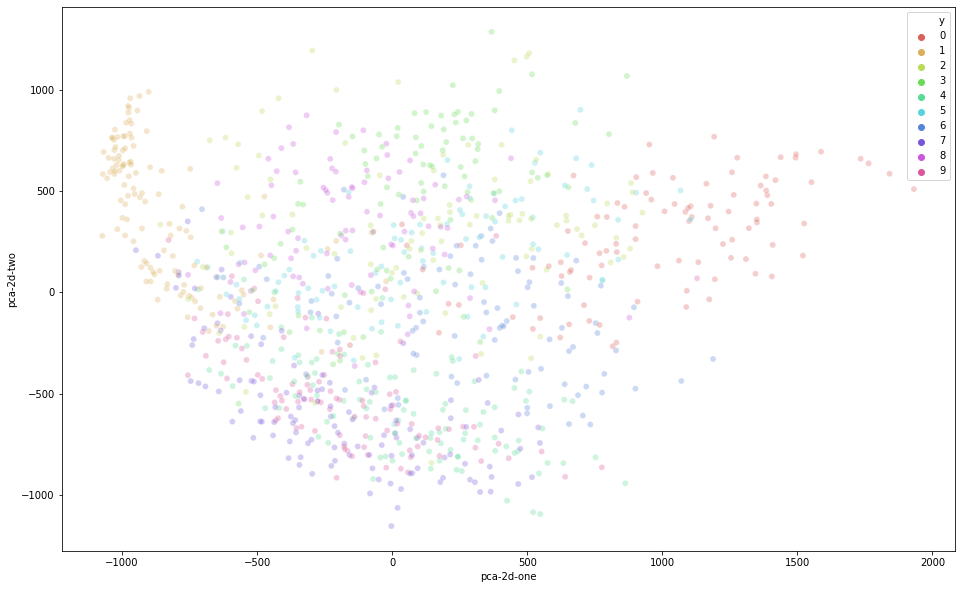

In [ ]:
import pandas as pd
import seaborn as sns

df_subset=pd.DataFrame()
df_subset['pca-2d-one'] = x_train_pca[:,0]
df_subset['pca-2d-two'] = x_train_pca[:,1]
df_subset['y'] = y_train

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 90)
fitter = pca.fit(x_train[:].reshape(x_train.shape[0],-1))

x_train_pca = fitter.transform(x_train[:].reshape(x_train.shape[0],-1))
x_test_pca = fitter.transform(x_test[:].reshape(x_test.shape[0],-1))

In [ ]:
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha=.001) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(x_train_pca, y_train[:])

RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
rr.score(x_train_pca, y_train)

0.886

In [ ]:
rr.score(x_test_pca, y_test)

0.81

In [ ]:
import keras
from keras.layers import Input, Dense, Flatten, Conv2D
from keras import Model
from keras import datasets, layers, models

Using TensorFlow backend.


In [ ]:
inputs = Input(shape=(28,28,1))

x = layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1))(inputs)
x = layers.Dropout(.3)(x)
x = layers.AveragePooling2D()(x)

x = layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu')(x)
x = layers.Dropout(.3)(x)
x = layers.AveragePooling2D()(x)

x = layers.Flatten()(x)

x = layers.Dense(units=120, activation='relu')(x)
x = layers.Dropout(.3)(x)

x = layers.Dense(units=84, activation='relu')(x)
x = layers.Dropout(.3)(x)

outputs = layers.Dense(units=10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 6)         0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(np.expand_dims(x_train,3),y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 1s 778us/step - loss: 6.5527 - sparse_categorical_accuracy: 0.1870
Epoch 2/100
1000/1000 [==============================] - 1s 593us/step - loss: 2.1141 - sparse_categorical_accuracy: 0.2780
Epoch 3/100
1000/1000 [==============================] - 1s 627us/step - loss: 1.8086 - sparse_categorical_accuracy: 0.3870
Epoch 4/100
1000/1000 [==============================] - 1s 598us/step - loss: 1.5269 - sparse_categorical_accuracy: 0.4950
Epoch 5/100
1000/1000 [==============================] - 1s 572us/step - loss: 1.2718 - sparse_categorical_accuracy: 0.5770
Epoch 6/100
1000/1000 [==============================] - 1s 587us/step - loss: 1.0287 - sparse_categorical_accuracy: 0.6660
Epoch 7/100
1000/1000 [==============================] - 1s 577us/step - loss: 0.8645 - sparse_categorical_accuracy: 0.7180
Epoch 8/100
1000/1000 [==============================] - 1s 632us/step - loss: 0.8157 - sparse_categorical_accuracy: 0.7400
Epoch 9/

In [ ]:
model.evaluate(np.expand_dims(x_test,3),y_test)

100/100 [==============================] - 0s 712us/step


[0.09569675683975219, 0.9700000286102295]

Text(0.5, 1.0, 'Target is 9, the prediction is 5')

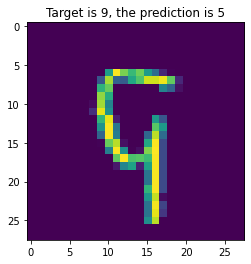

In [ ]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(x_test[ind])
plt.title(f'Target is {y_test[ind]}, the prediction is {np.argmax(model.predict(np.expand_dims(x_test,3))[ind])}')

In [ ]:
from umap import UMAP
import matplotlib.pyplot as plt

In [ ]:
model_outputs = model.predict(np.expand_dims(x_train,3))
reducer = UMAP(random_state=42)
reducer.fit(model_outputs)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [ ]:
embedding = reducer.transform(model_outputs)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1000, 2)

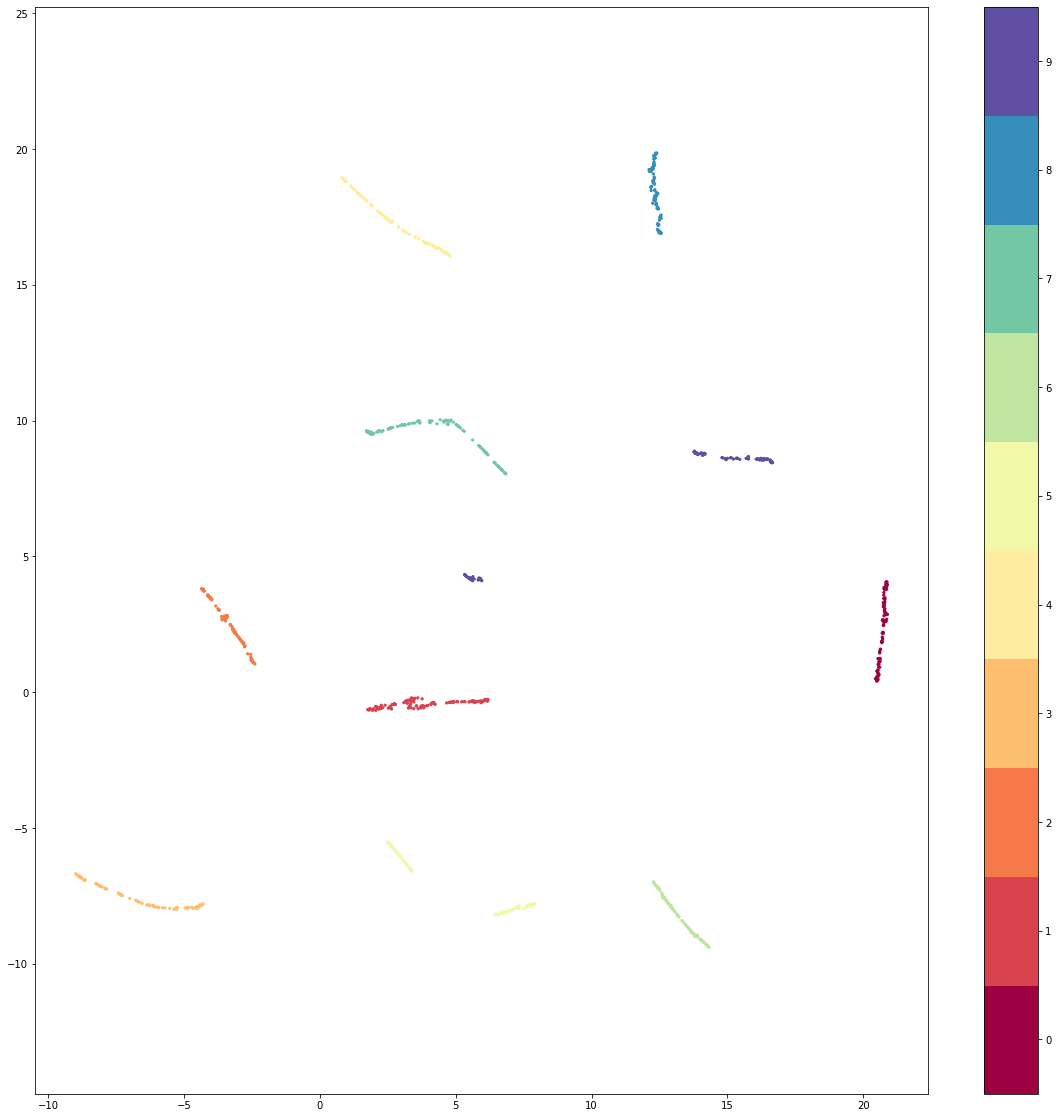

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.title('UMAP projection with Sparse Categorical Crossentropy loss', fontsize=24)

![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [10]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [11]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [21]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [23]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2467 - val_loss: 0.1620
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1432 - val_loss: 0.1266
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1185 - val_loss: 0.1091
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1044 - val_loss: 0.0979
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0949 - val_loss: 0.0900
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0881 - val_loss: 0.0847
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0837 - val_loss: 0.0814
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0808 - val_loss: 0.0787
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0788 - val_loss: 0.0772
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0774 - val_loss: 0.0761

KeyboardInterrupt: ignored

In [24]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

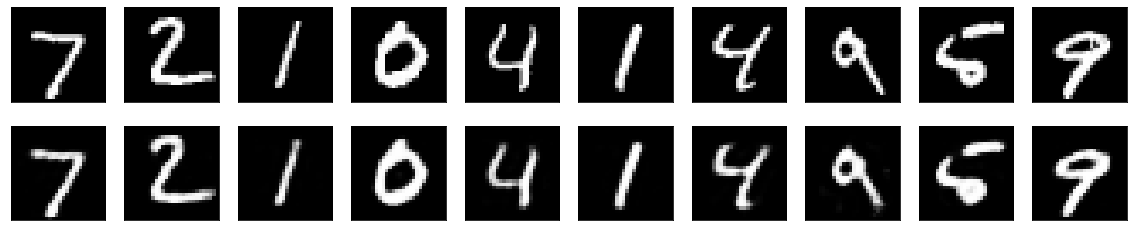

In [25]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [28]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0866 - val_loss: 0.0851
Epoch 2/100
107/235 [============>.................] - ETA: 0s - loss: 0.0851

KeyboardInterrupt: ignored

In [29]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [31]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
  1/469 [..............................] - ETA: 0s - loss: 0.6802WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 4s 8ms/step - loss: 0.2076 - val_loss: 0.1483
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1350 - val_loss: 0.1245
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1210 - val_loss: 0.1162
Epoch 4/50
342/469 [====================>.........] - ETA: 0s - loss: 0.1154

KeyboardInterrupt: ignored

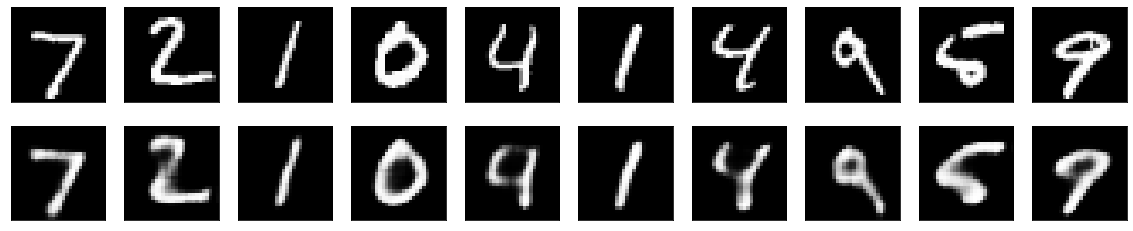

In [35]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()